In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time 
from datetime import datetime
import requests
from config import weather_api_key



In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
#create a set of random latitude and longitude cominations
lats= np.random.uniform(low= -90.000, high=90.000, size= 1500)
longs= np.random.uniform(low= -180.000, high= 180.000, size= 1500)
lats_longs = zip(lats, longs)

lats_longs

In [4]:
#add the lats and longs to a list
coordinates = list(lats_longs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
city_data_df= pd.read_csv("weather_data/cities.csv")
city_data_df.head()


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Bentiu,SS,2022-01-30 22:04:47,9.2333,29.8333,74.28,19,100,7.00
1,1,Hanmer Springs,NZ,2022-01-30 22:06:29,-42.5167,172.8167,74.37,44,7,4.25
2,2,Tadine,NC,2022-01-30 22:06:14,-21.5500,167.8833,81.88,80,96,9.24
3,3,Hobart,AU,2022-01-30 22:04:52,-42.8794,147.3294,69.12,80,20,6.91
4,4,Hermanus,ZA,2022-01-30 22:04:51,-34.4187,19.2345,71.91,86,97,12.95


In [7]:
# # create an empty list to hold the weather data
# city_data= []

# #print the beginning of the logging
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# #create counters
# record_count= 1
# set_count= 1

# #Loop through all the cities in our list
# for i, city in enumerate(cities):

#     #group in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     #create endpoint URL with each city
#     city_url = url + "&q=" + city.replace(" ", "+")

#     #Log the URL, record, and set numbers and the city
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")

#     #add 1 to the record count
#     record_count += 1

# #run an API request for each of the cities
#     try:
#         #parse the JSON and retrieve the data
#         city_weather = requests.get(city_url).json()

#         #parse out the needed data
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humdity = city_weather["main"]["humidity"]
#         city_clouds= city_weather["clouds"]["all"]
#         city_wind= city_weather["wind"]["speed"]
#         city_country= city_weather["sys"]["country"]

#         #convert the date to ISO standard
#         city_date= datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")

#         #append the city information into the city_data list.
#         city_data.append({"City":city.title(),
#                         "Lat": city_lat,
#                         "Lng": city_lng,
#                         "Max Temp": city_max_temp,
#                         "Humidity": city_humdity,
#                         "Cloudiness": city_clouds,
#                         "Wind Speed": city_wind,
#                         "Country": city_country,
#                         "Date": city_date})

# #if an error is experienced, skip the city
#     except:
#         print("City not found. Skipping...")
#         pass

# #indicate that the data loading is complete
# print("---------------------------------")
# print("Data Retrival Complete           ")
# print("---------------------------------")



In [8]:
len(city_data_df)

540

In [9]:
# #Convert the array of dictionaries to a pandas dataframe
# city_data_df= pd.DataFrame(city_data)
# city_data_df.head(10)

In [10]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df= city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bentiu,SS,2022-01-30 22:04:47,9.2333,29.8333,74.28,19,100,7.00
1,Hanmer Springs,NZ,2022-01-30 22:06:29,-42.5167,172.8167,74.37,44,7,4.25
2,Tadine,NC,2022-01-30 22:06:14,-21.5500,167.8833,81.88,80,96,9.24
3,Hobart,AU,2022-01-30 22:04:52,-42.8794,147.3294,69.12,80,20,6.91
4,Hermanus,ZA,2022-01-30 22:04:51,-34.4187,19.2345,71.91,86,97,12.95
...,...,...,...,...,...,...,...,...,...
535,Coahuayana,MX,2022-01-30 22:21:21,18.7333,-103.6833,90.88,30,0,7.00
536,Kikwit,CD,2022-01-30 22:21:22,-5.0410,18.8162,75.60,72,100,0.38
537,Iranshahr,IR,2022-01-30 22:21:22,27.2025,60.6848,61.50,55,0,1.43
538,Foz,ES,2022-01-30 22:21:23,43.5692,-7.2544,50.41,90,66,5.99


In [11]:
# # Create the output file (CSV)
# output_data_file= "weather_data/cities.csv"

# #export the city_data into a CSV
# city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#extract relevant fields from the dataframe for plotting
lats= city_data_df["Lat"]
max_temps= city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness= city_data_df["Cloudiness"]
wind_speed= city_data_df["Wind Speed"]


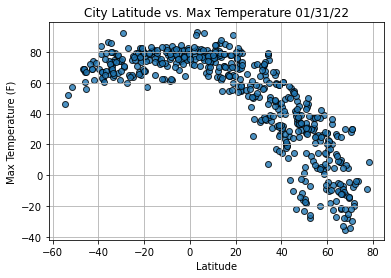

In [13]:
#import time module
import time

#build the scatter plot for latitude vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor= "black", linewidths=1, marker= "o",
            alpha=0.8, label= "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

plt.show()

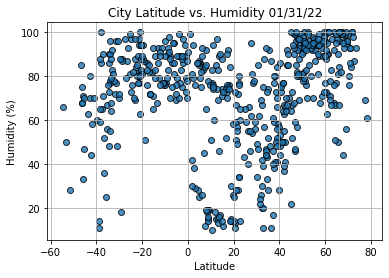

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

plt.show()

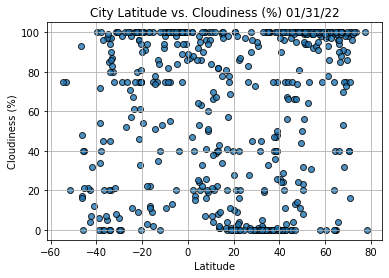

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

plt.show()

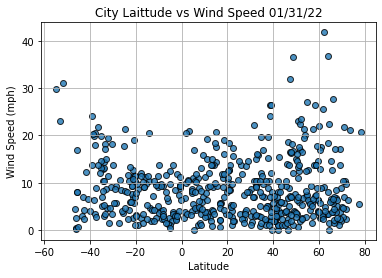

In [16]:
#Build the scatter plots for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths= 1, marker= "o",
            alpha=0.8, label= "Cities")
            
#Incorporate the other graph properties
plt.title(f"City Laittude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

plt.show()

In [17]:

# import linregress
import scipy
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #calculate the regression line "y value" from the slope an intercept
    regress_values= x_values * slope + intercept

    #get the equation of the line
    line_eq= "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")

    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize= 15, color= "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    print(r_value)
    # print(p_value)
    
    plt.show()

In [18]:
#create Northern and southern hemisphere dataframes
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"] >=0)]


-0.8606191625171561


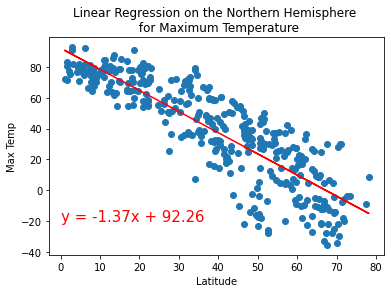

In [19]:
# Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', "Max Temp", (0, -20))

-0.8606191625171561


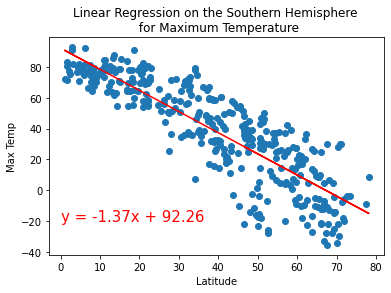

In [20]:
#Linear Regresssion on the Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (0, -20))

0.49003042037641026


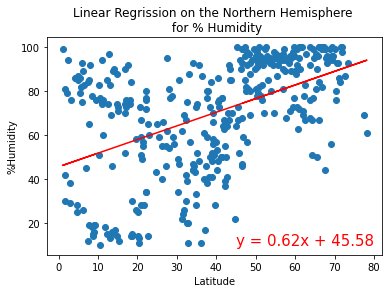

In [21]:
#Linear Regression on the Northern Hemisphere 
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]

#Call the function 
plot_linear_regression(x_values, y_values, 
                        "Linear Regrission on the Northern Hemisphere \n for % Humidity", "%Humidity", (45, 10))

0.49003042037641026


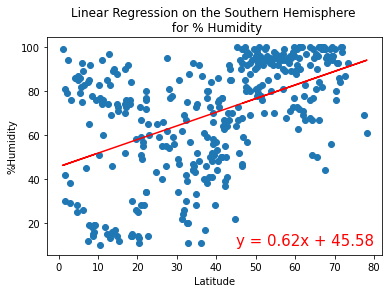

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '%Humidity',(45,10))


0.34163825204736


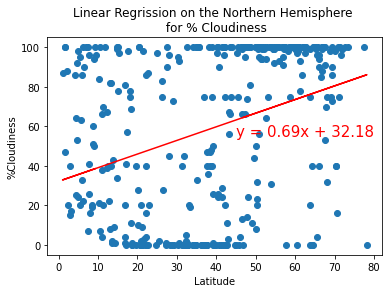

In [23]:
#Linear Regression on the Northern Hemisphere 
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]

#Call the function 
plot_linear_regression(x_values, y_values, 
                        "Linear Regrission on the Northern Hemisphere \n for % Cloudiness", "%Cloudiness", (45, 55))

0.34163825204736


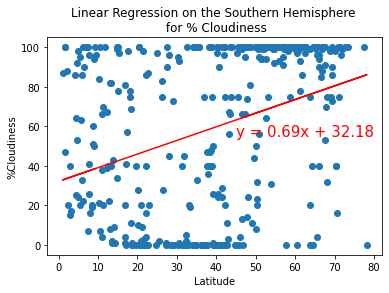

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '%Cloudiness',(45,55))

0.06789840172755889


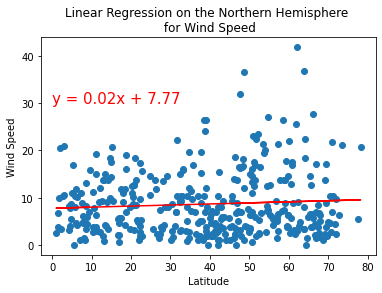

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))


0.06789840172755889


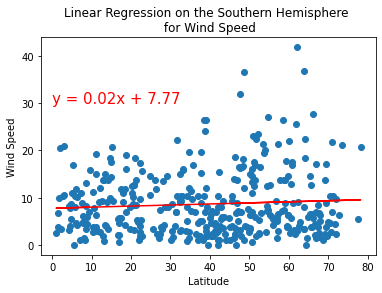

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))